Shape of X: (572, 30)
Shape of y: (572,)

Shape of training set (X_train): (457, 30)
Shape of testing set (X_test): (115, 30)
Shape of training labels (y_train): (457,)
Shape of testing labels (y_test): (115,)

Distribution of the target variable in the training set:
1    229
0    228
Name: count, dtype: int64

Distribution of the target variable after SMOTE:
0    229
1    229
Name: count, dtype: int64
Epoch 1/100


C:\Users\KIIT\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.6024 - loss: 1.9921 - val_accuracy: 0.9674 - val_loss: 1.6100
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8855 - loss: 1.6280 - val_accuracy: 0.9891 - val_loss: 1.3923
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9412 - loss: 1.4135 - val_accuracy: 0.9891 - val_loss: 1.2427
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9675 - loss: 1.2775 - val_accuracy: 0.9891 - val_loss: 1.1290
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9425 - loss: 1.1899 - val_accuracy: 0.9891 - val_loss: 1.0310
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9608 - loss: 1.0915 - val_accuracy: 0.9891 - val_loss: 0.9438
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9591 - loss: 0.9762 - val_accuracy: 0.9891 - val_loss: 0.8671
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9778 - loss: 0.9066 - val_accuracy: 0.9891 - val_l

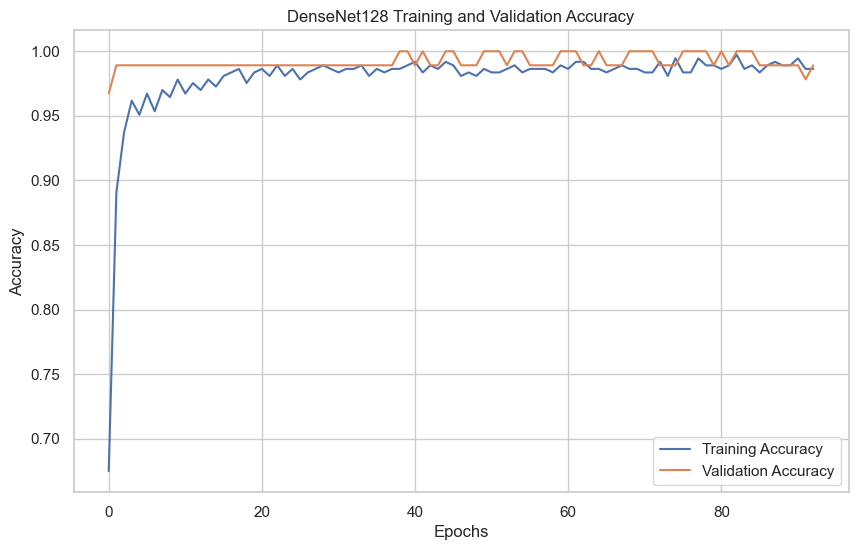

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step

Model Evaluation Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


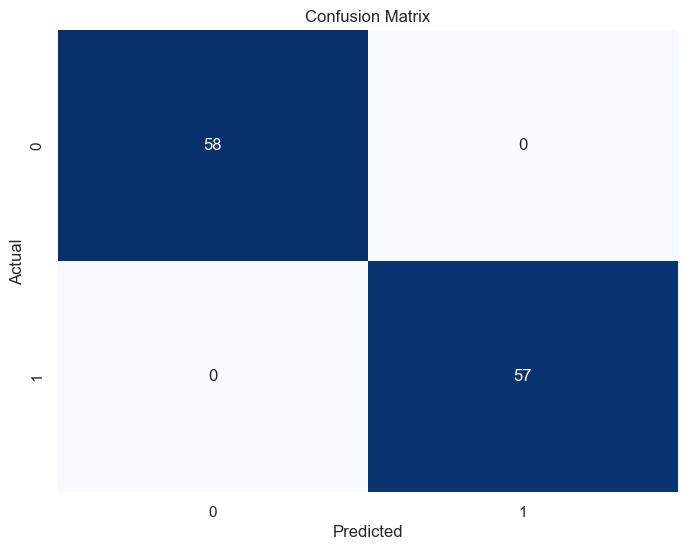


Model training completed! Models saved to `models/`.


In [17]:
# ---
# jupyter:
#   jupytext:
#     text_representation:
#       extension: .py
#       format_name: light
#       format_version: '1.5'
#       jupytext_version: 1.14.4
#   kernelspec:
#     display_name: Python 3
#     language: python
#     name: python3
# ---

# # Breast Cancer Prediction - Model Training (Fixed for Inconsistent Sample Sizes)

# ## 1. Import Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set(style="whitegrid")

# ## 2. Load the Preprocessed Data
# Load the preprocessed data from the `data/processed/` folder
X = np.load('../data/processed/X_train.npy')
y = np.load('../data/processed/y_train.npy')

# Display the shape of the dataset
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# ## 3. Split the Data into Training and Testing Sets
# Ensure X and y have the same number of samples
assert X.shape[0] == y.shape[0], "X and y must have the same number of samples"

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
print("\nShape of training set (X_train):", X_train.shape)
print("Shape of testing set (X_test):", X_test.shape)
print("Shape of training labels (y_train):", y_train.shape)
print("Shape of testing labels (y_test):", y_test.shape)

# ## 4. Handle Class Imbalance (if any)
# Check the distribution of the target variable in the training set
print("\nDistribution of the target variable in the training set:")
print(pd.Series(y_train).value_counts())

# Apply SMOTE to balance the classes (if imbalanced)
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

# Display the distribution of the target variable after SMOTE
print("\nDistribution of the target variable after SMOTE:")
print(pd.Series(y_res).value_counts())

# ## 5. Build Neural Networks for Feature Extraction

# ### 5.1 Define a Neural Network Model with Regularization
def build_densenet(input_dim):
    model = Sequential()
    model.add(Dense(128, input_dim=input_dim, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.5))  # Add dropout to prevent overfitting
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.5))  # Add dropout to prevent overfitting
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# ### 5.2 Train DenseNet128 with Early Stopping
# Build the DenseNet128 model
densenet128 = build_densenet(X_res.shape[1])

# Add early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the DenseNet128 model
history_densenet128 = densenet128.fit(
    X_res, y_res,
    epochs=100,  # Increase epochs but use early stopping
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history_densenet128.history['accuracy'], label='Training Accuracy')
plt.plot(history_densenet128.history['val_accuracy'], label='Validation Accuracy')
plt.title('DenseNet128 Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# ### 5.3 Extract Predictions from DenseNet128
# Extract predictions from DenseNet128 in batches to avoid retracing
batch_size = 32
predictions_densenet128 = np.concatenate([
    densenet128.predict(X_test[i:i + batch_size])
    for i in range(0, len(X_test), batch_size)
])

# ## 6. Build Enhanced Random Forest (E-RF)

# ### 6.1 Create Meta-Features
# Combine predictions from DenseNet128 to create meta-features
meta_features = predictions_densenet128

# ### 6.2 Train Enhanced Random Forest with Reduced Complexity
# Train the Enhanced Random Forest with reduced complexity
enhanced_rf = RandomForestClassifier(
    n_estimators=50,  # Reduce the number of trees
    max_depth=5,       # Limit the depth of the trees
    random_state=42
)
enhanced_rf.fit(meta_features, y_test)

# ## 7. Evaluate the Model

# ### 7.1 Make Predictions
# Make predictions using the Enhanced Random Forest
y_pred = enhanced_rf.predict(meta_features)

# ### 7.2 Evaluate Performance
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nModel Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# ### 7.3 Confusion Matrix
# Generate and visualize the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ## 8. Save the Trained Models
# Save the DenseNet128 model
densenet128.save('../models/densenet128_model.h5')

# Save the Enhanced Random Forest model
import joblib
joblib.dump(enhanced_rf, '../models/enhanced_rf_model.pkl')

print("\nModel training completed! Models saved to `models/`.")

Shape of test set (X_test): (114, 30)
Shape of test labels (y_test): (114,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step

Model Evaluation Metrics:
Accuracy: 0.9649122807017544
Precision: 0.975609756097561
Recall: 0.9302325581395349
F1-Score: 0.9523809523809523


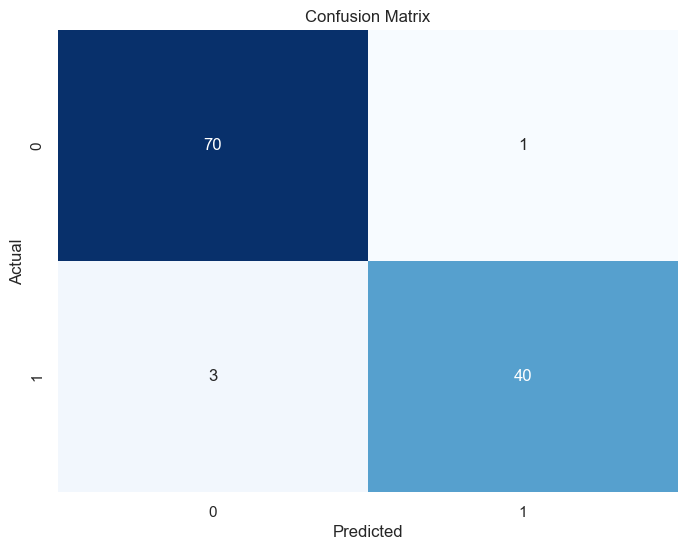


Model testing completed!


In [19]:
# ---
# jupyter:
#   jupytext:
#     text_representation:
#       extension: .py
#       format_name: light
#       format_version: '1.5'
#       jupytext_version: 1.14.4
#   kernelspec:
#     display_name: Python 3
#     language: python
#     name: python3
# ---

# # Breast Cancer Prediction - Model Testing

# ## 1. Import Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Set style for plots
sns.set(style="whitegrid")

# ## 2. Load the Preprocessed Test Data
# Load the preprocessed test data from the `data/processed/` folder
X_test = np.load('../data/processed/X_test.npy')
y_test = np.load('../data/processed/y_test.npy')

# Display the shape of the test set
print("Shape of test set (X_test):", X_test.shape)
print("Shape of test labels (y_test):", y_test.shape)

# ## 3. Load the Trained Models

# ### 3.1 Load the DenseNet128 Model
densenet128 = tf.keras.models.load_model('../models/densenet128_model.h5')

# ### 3.2 Load the Enhanced Random Forest Model
enhanced_rf = joblib.load('../models/enhanced_rf_model.pkl')

# ## 4. Make Predictions on the Test Set

# ### 4.1 Extract Predictions from DenseNet128
# Extract predictions from DenseNet128 in batches to avoid retracing
batch_size = 32
predictions_densenet128 = np.concatenate([
    densenet128.predict(X_test[i:i + batch_size])
    for i in range(0, len(X_test), batch_size)
])

# ### 4.2 Make Predictions Using the Enhanced Random Forest
# Make predictions using the Enhanced Random Forest
y_pred = enhanced_rf.predict(predictions_densenet128)

# ## 5. Evaluate the Model

# ### 5.1 Calculate Evaluation Metrics
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nModel Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# ### 5.2 Confusion Matrix
# Generate and visualize the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ## 6. Interpret the Results
# - **Accuracy**: Percentage of correctly classified samples.
# - **Precision**: Percentage of correctly predicted positive samples out of all predicted positive samples.
# - **Recall**: Percentage of correctly predicted positive samples out of all actual positive samples.
# - **F1-Score**: Harmonic mean of precision and recall.
# - **Confusion Matrix**: Visual representation of true positives, true negatives, false positives, and false negatives.

print("\nModel testing completed!")